<a href="https://colab.research.google.com/github/DengChiung/kmuh20230325/blob/main/%E8%A7%A3%E9%87%8B%E6%8D%B2%E6%A9%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# demo用的彩色圖片
import os
from urllib.request import urlretrieve
if not os.path.exists("color.jpg"):
    url = "https://github.com/Elwing-Chou/kmuml/raw/main/kmu.jpg"
    urlretrieve(url, "color.jpg")

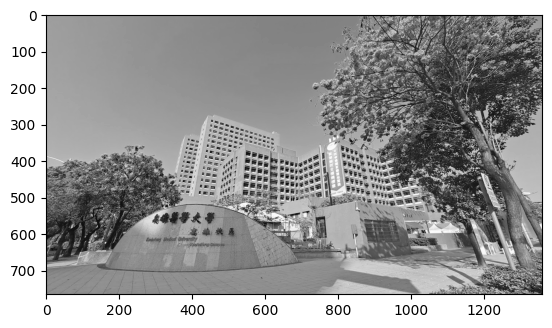

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# to gray manually
# https://pillow.readthedocs.io/en/stable/_modules/PIL/Image.html#Image.convert
img_color = Image.open("color.jpg")
# RGB, RGBA, L(gray)
# 這句註解可以幫你直接轉成灰階
# img_color.convert("L")
# /255.0 0~255->0.0~1.0
img_color_np = np.array(img_color) / 255.0
shape = img_color_np.shape
# 保存我灰階圖片
img_np = np.zeros(shape[:2])
for i in range(shape[0]):
    for j in range(shape[1]):
        r, g, b = img_color_np[i][j]
        # 30%r 60%g 10%b->灰階
        img_np[i][j] = 0.299 * r + 0.587 * g + 0.114 * b
plt.imshow(img_np, cmap="gray")

In [ ]:
# Gx
shape = img_np.shape
img_gx = np.zeros(shape)
Gx = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]
# 走過每一個像素
for i in range(1, shape[0]-1):
    for j in range(1, shape[1]-1):
        # 拿到中心
        ci, cj = i, j
        newvalue = 0
        for addi in [-1, 0, 1]:
            for addj in [-1, 0, 1]:
                # 1 * p0 + 2 * p1 + 1 * p2 + ....
                ti, tj = ci+addi, cj+addj
                newvalue = newvalue + Gx[addi+1][addj+1] * img_np[ti][tj]
        # 結合完以後取絕對值
        img_gx[ci][cj] = abs(newvalue)
img_gx

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.002     , 0.00268235,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00178824, 0.00089412,
        0.        ],
       ...,
       [0.        , 0.09803922, 0.02745098, ..., 0.01504706, 0.05141569,
        0.        ],
       [0.        , 0.01568627, 0.07843137, ..., 0.57427451, 0.10447451,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

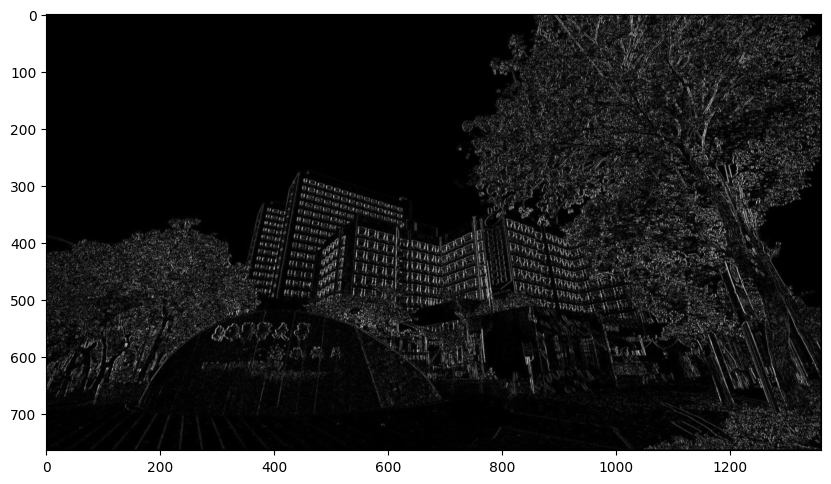

In [ ]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_gx.max(), img_gx.min()
img_gx_scale = (img_gx - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_gx_scale, cmap="gray")

In [ ]:
# Gy
shape = img_np.shape
img_gy = np.zeros(shape)
Gy = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]
for i in range(1, shape[0]-1):
    for j in range(1, shape[1]-1):
        # 中心
        ci, cj = i, j
        newvalue = 0
        for addi in [-1, 0, 1]:
            for addj in [-1, 0, 1]:
                # target
                ti, tj = ci+addi, cj+addj
                newvalue = newvalue + Gy[addi+1][addj+1] * img_np[ti][tj]
        img_gy[ci][cj] = abs(newvalue)
img_gy

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.62745098e-05, 1.25490196e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.66274510e-03, 1.25490196e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.74509804e-02, 3.52941176e-02, ...,
        3.98686275e-01, 4.29086275e-01, 0.00000000e+00],
       [0.00000000e+00, 3.13725490e-02, 1.25490196e-01, ...,
        5.39505882e-01, 1.45211765e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

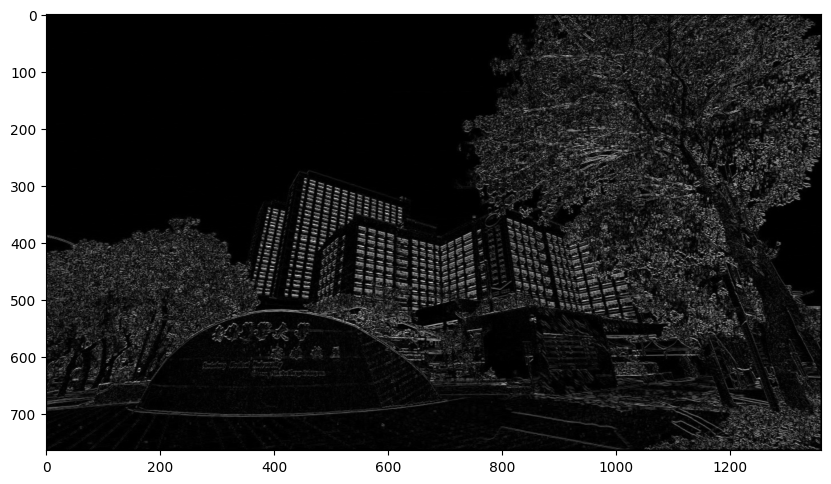

In [ ]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_gy.max(), img_gy.min()
img_gy_scale = (img_gy - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_gy_scale, cmap="gray")

In [ ]:
img_sobel = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        # 根號(值邊緣^2 + 恆邊緣^2)
        img_sobel[i][j] = (img_gx[i][j] ** 2 + img_gy[i][j] ** 2) ** 0.5
img_sobel

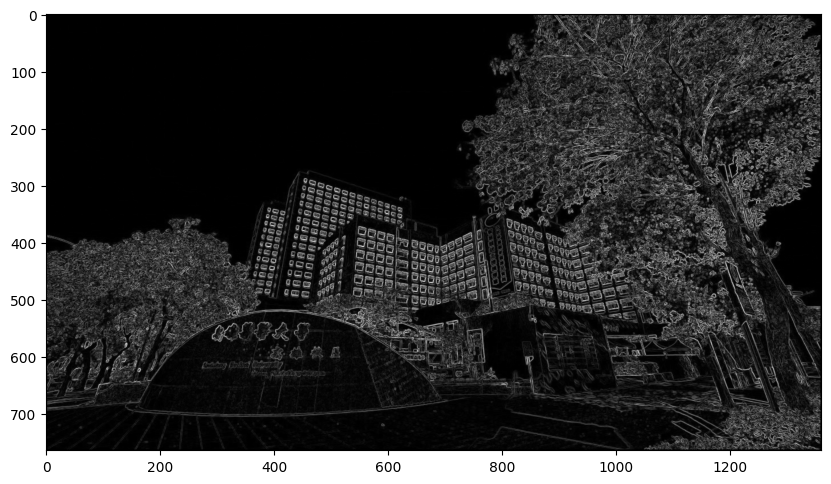

In [ ]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_sobel.max(), img_sobel.min()
img_sobel_scale = (img_sobel - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_sobel_scale, cmap="gray")

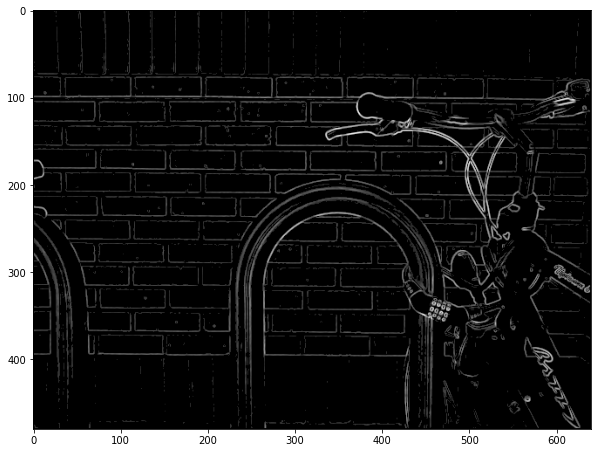

In [ ]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_sobel.max(), img_sobel.min()
img_sobel_scale = (img_sobel - mi) / (ma - mi)

img_sobel_scale_th = np.zeros(shape)
# threshold
th = 0.15
for i in range(shape[0]):
    for j in range(shape[1]):
        if img_sobel_scale[i][j] >= th:
            img_sobel_scale_th[i][j] = img_sobel_scale[i][j]

plt.figure(figsize=(10, 10))
plt.imshow(img_sobel_scale_th, cmap="gray")